In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
from PIL import Image, ImageOps
from scipy.io import wavfile
import json

In [2]:
# Q1

In [3]:
#a

In [1]:
# function to normalize the image data
def Normalize_image(data):
  return [[(pixel - 127.5) / 127.5 for pixel in row] for row in data]

In [68]:
#function to plot the color vs grayscale image, unnormalized vs normalized image.
def plots_and_images(img_color1, img_gray1, norm_gray1):
    # Create a subplot for side-by-side images
    fig, axes = plt.subplots(2, 2, figsize=(10, 5))

    # Show color image
    axes[0,0].imshow(img_color1)
    axes[0,0].set_title('Original Color Image')
    axes[0,0].axis('off')  # Turn off axis

    # Show grayscale image (normalized)
    axes[0,1].imshow(img_gray1, cmap='gray')
    axes[0,1].set_title('Grayscale Image (Normalized)')
    axes[0,1].axis('off')  # Turn off axis

    axes[1,0].hist(img_gray1)
    axes[1,0].set_title('Unnormalized Image')
    axes[1,0].axis('on')  # Turn off axis

    axes[1,1].hist(norm_gray1)
    axes[1,1].set_title('Normalized Image')
    axes[1,1].axis('on')  # Turn off axis

    plt.show()


In [5]:
def preprocess_image(image_path):
    # Load image using PIL
    img = Image.open(image_path)
    # Convert to grayscale
    img_gray = img.convert("L")
    # save data from image
    img_color_array = list(img.getdata())
    img_gray_array = list(img_gray.getdata())
    img_color_array = [img_color_array[i:i + img.width] for i in range(0, len(img_color_array), img.width)]
    img_gray_array = [img_gray_array[i:i + img_gray.width] for i in range(0, len(img_gray_array), img_gray.width)]
    return img_color_array, img_gray_array

In [21]:
#path for Data Loading
img_dir_path = "MLA2_DATA/MLA2_DATA/IMAGE"

In [36]:
# loading the directory and skipping hidden files
img_dir_files_lst = os.listdir(img_dir_path)
filtered_files_iter = iter(map(lambda x: x * (x != ".DS_Store"), img_dir_files_lst))
img_dir_files_lst = list(filter(None, filtered_files_iter))
# img_dir_files_lst

In [35]:
#Loading whole dataset and labels in lists
img_data_color = []
img_data_gray = []
img_data_gray_normalized = []
labels = []
for i in img_dir_files_lst:
    img_lst = os.listdir(f"{img_dir_path}/{i}")
    col_img_data_temp=[]
    gray_img_data_temp = []
    norm_gray_data_temp = []
    for j in img_lst:
        img_path = f"{img_dir_path}/{i}/{j}"
        col_data,gray_data = preprocess_image(img_path)
        norm_gra_data = Normalize_image(gray_data)
        col_img_data_temp.append(col_data)
        gray_img_data_temp.append(gray_data)
        norm_gray_data_temp.append(norm_gra_data)
    img_data_color.append(col_img_data_temp)
    img_data_gray.append(gray_img_data_temp)
    img_data_gray_normalized.append(norm_gray_data_temp)
    labels.append(i)

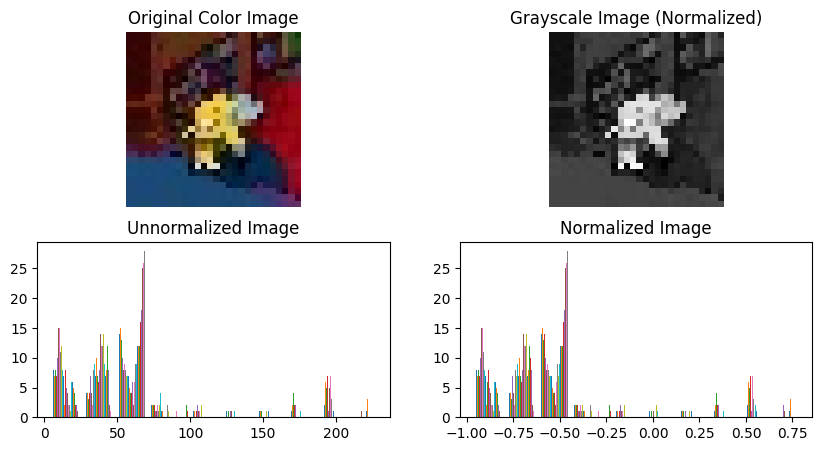

[[(50, 5, 10), (49, 4, 7), (51, 5, 5), (54, 6, 2), (82, 33, 28), (93, 44, 30), (94, 48, 24), (91, 52, 19), (82, 52, 16), (87, 57, 21), (89, 45, 18), (94, 47, 19), (95, 50, 19), (88, 42, 16), (96, 39, 28), (103, 55, 51), (38, 14, 14), (55, 30, 26), (105, 53, 40), (98, 43, 23), (37, 1, 0), (103, 72, 54), (62, 23, 18), (53, 15, 12), (33, 10, 0), (89, 88, 60), (51, 76, 34), (15, 55, 5)], [(50, 4, 7), (51, 5, 7), (54, 6, 6), (55, 6, 2), (89, 39, 32), (88, 39, 24), (87, 41, 17), (94, 53, 23), (88, 55, 20), (87, 52, 20), (96, 51, 22), (94, 48, 22), (85, 49, 23), (82, 50, 27), (60, 20, 8), (42, 7, 3), (101, 76, 80), (77, 47, 49), (102, 50, 39), (102, 46, 31), (42, 4, 0), (51, 24, 17), (46, 19, 26), (38, 11, 16), (51, 27, 15), (100, 93, 65), (52, 73, 32), (37, 73, 25)], [(53, 5, 5), (57, 9, 9), (54, 3, 2), (52, 0, 0), (101, 49, 38), (72, 23, 6), (94, 48, 25), (95, 51, 24), (91, 50, 20), (89, 48, 18), (91, 41, 14), (88, 47, 25), (39, 22, 6), (18, 12, 0), (62, 54, 41), (106, 93, 87), (106, 82, 95

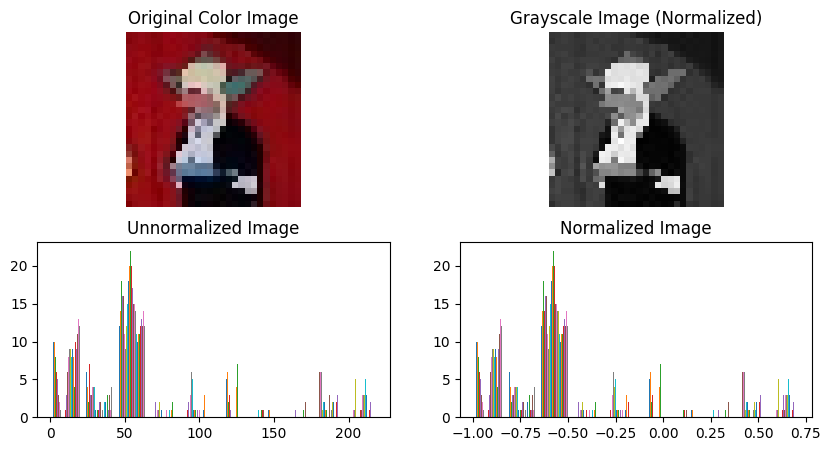

[[(133, 6, 13), (135, 8, 15), (142, 10, 21), (136, 9, 16), (128, 5, 10), (132, 7, 13), (146, 6, 19), (148, 6, 22), (142, 6, 18), (141, 11, 23), (135, 9, 21), (131, 7, 18), (132, 8, 19), (118, 3, 10), (90, 0, 0), (81, 0, 0), (71, 0, 3), (57, 0, 0), (63, 2, 10), (58, 1, 8), (56, 3, 11), (51, 2, 8), (53, 8, 11), (48, 3, 6), (51, 5, 7), (51, 5, 7), (47, 0, 6), (50, 5, 10)], [(130, 3, 10), (138, 8, 16), (145, 11, 20), (139, 8, 16), (132, 7, 13), (133, 6, 13), (147, 7, 20), (144, 2, 16), (144, 8, 20), (138, 8, 20), (136, 10, 22), (127, 7, 19), (126, 16, 27), (120, 16, 23), (123, 24, 29), (105, 13, 16), (82, 0, 4), (74, 0, 3), (67, 0, 1), (60, 0, 0), (58, 0, 5), (57, 4, 10), (50, 4, 7), (52, 6, 8), (52, 3, 6), (53, 4, 7), (47, 1, 4), (50, 5, 8)], [(140, 10, 20), (140, 9, 17), (143, 6, 14), (143, 6, 14), (136, 6, 14), (132, 2, 10), (145, 8, 16), (148, 8, 17), (141, 5, 15), (142, 10, 23), (132, 4, 19), (123, 11, 25), (105, 22, 32), (102, 25, 33), (114, 17, 24), (118, 13, 18), (121, 16, 21), (11

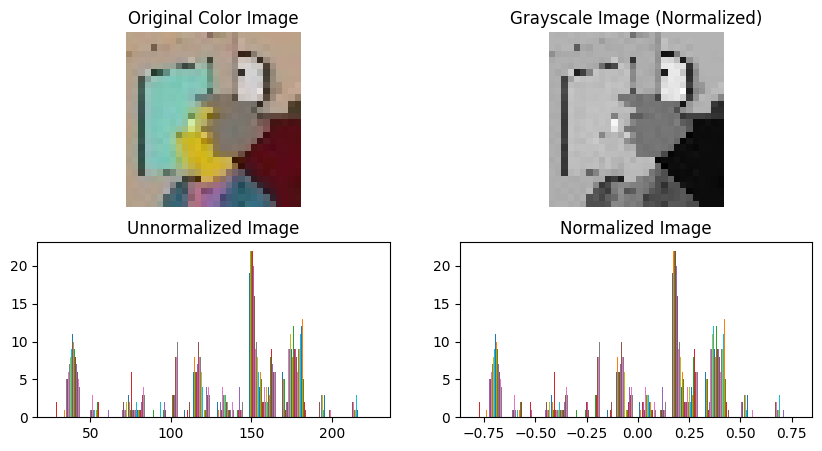

[[(186, 165, 138), (186, 162, 136), (188, 160, 139), (191, 163, 142), (186, 162, 138), (187, 163, 135), (194, 163, 134), (191, 162, 130), (183, 162, 135), (185, 168, 142), (185, 164, 143), (180, 157, 139), (188, 160, 148), (136, 108, 94), (161, 141, 116), (165, 148, 120), (179, 157, 136), (163, 141, 120), (185, 164, 143), (184, 164, 139), (185, 163, 139), (187, 163, 137), (189, 161, 137), (191, 161, 137), (192, 160, 137), (191, 161, 137), (189, 161, 137), (188, 162, 137)], [(187, 163, 135), (188, 164, 138), (188, 161, 140), (187, 160, 139), (183, 161, 138), (188, 164, 140), (190, 160, 132), (186, 159, 130), (168, 147, 120), (176, 158, 134), (180, 159, 138), (184, 161, 143), (178, 155, 141), (180, 157, 141), (183, 163, 139), (180, 160, 136), (181, 155, 138), (162, 136, 119), (196, 173, 155), (183, 162, 141), (180, 160, 136), (186, 164, 140), (190, 164, 141), (189, 161, 139), (189, 161, 137), (189, 161, 137), (188, 162, 137), (187, 163, 137)], [(189, 162, 133), (185, 159, 132), (187, 165

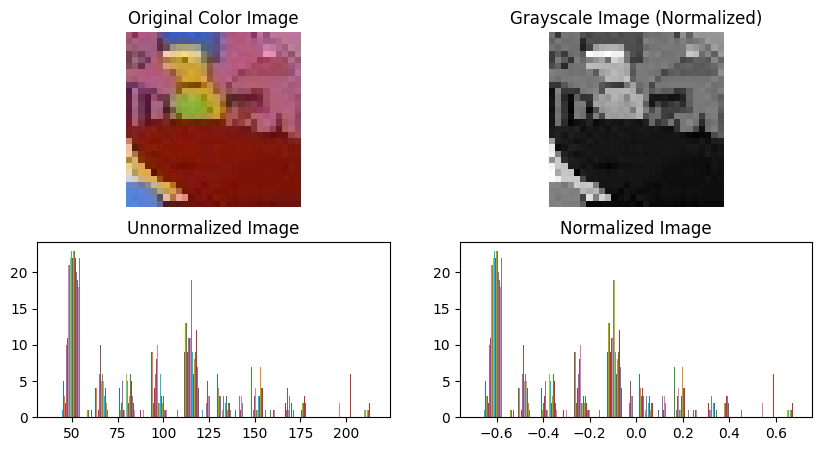

[[(169, 90, 122), (131, 49, 85), (177, 88, 132), (173, 88, 130), (166, 95, 129), (115, 77, 126), (69, 81, 167), (59, 94, 196), (63, 92, 192), (62, 90, 189), (66, 95, 199), (55, 89, 189), (60, 97, 188), (67, 94, 175), (86, 83, 154), (132, 97, 155), (167, 91, 137), (176, 84, 123), (179, 88, 129), (177, 92, 134), (136, 54, 100), (187, 111, 157), (149, 81, 122), (186, 120, 156), (185, 118, 151), (188, 119, 150), (192, 117, 158), (193, 116, 160)], [(157, 82, 112), (171, 96, 129), (167, 86, 127), (167, 89, 129), (165, 94, 128), (94, 49, 90), (90, 88, 151), (71, 90, 156), (76, 91, 146), (76, 92, 144), (72, 91, 150), (71, 95, 159), (65, 96, 163), (74, 94, 163), (83, 78, 144), (147, 109, 168), (171, 95, 141), (180, 88, 127), (178, 88, 126), (181, 95, 134), (168, 87, 128), (176, 99, 141), (162, 91, 133), (164, 96, 135), (172, 105, 138), (188, 121, 152), (186, 116, 152), (187, 115, 153)], [(161, 98, 119), (153, 91, 116), (161, 97, 132), (160, 94, 132), (161, 91, 127), (98, 39, 67), (105, 74, 89),

In [70]:
#plot 4 random images
for i in random.sample(range(len(labels)), 4):
    for j in random.sample(range(len(img_data_color[i])), 1):
        plots_and_images(img_data_color[i][j],img_data_gray[i][j],img_data_gray_normalized[i][j])
        print(img_data_color[i][j])
        print(img_data_gray[i][j])
        print(img_data_gray_normalized[i][j])

# c

In [5]:
def load_data(file_path):
    """Load JSONL data from a file and return as a list of dictionaries."""
    data_samples = []
    with open(file_path, 'r') as file:
        for line in file:
            data_samples.append(json.loads(line))  # Parse each JSON line and add to list
    return data_samples

In [16]:
def create_dict(sentences):
    """Create a character-to-number dictionary from the given sentences."""
    all_text = ''.join(sentences)  # Combine all sentences into one string
    unique_chars = sorted(set(all_text))  # Get unique characters
    char_to_num = {char: index for index, char in enumerate(unique_chars)}
    return char_to_num

In [7]:
def tokenize_sentence(sentence, char_to_num):
    """Tokenize a given sentence using the character-to-number dictionary."""
    return [char_to_num[char] for char in sentence]  # List comprehension for tokenization

In [17]:
file_path = 'MLA2_DATA/MLA2_DATA/TEXT/train.jsonl'
data_samples = load_data(file_path)

# Collect sentences from the dataset
sentences = []
for sample in data_samples:
    sentences.append(sample['norm'])
    sentences.append(sample['situation'])
    sentences.append(sample['intention'])
char_to_num = create_dict(sentences)

# Tokenize each sentence
tokenized_sentences = {sentence: tokenize_sentence(sentence, char_to_num) for sentence in sentences}

In [18]:
# Print original and tokenized sentences for the selected samples
for sentence, tokenized in random.sample(list(tokenized_sentences.items()), 4):
    print("Original Sentence:")
    print(sentence)
    print("Tokenized Sentence:")
    print(tokenized)
    print()

Original Sentence:
Jessica, who lives with her housemate Paul, just found out that her boyfriend Brandon cheated on her.
Tokenized Sentence:
[35, 58, 72, 72, 62, 56, 54, 9, 0, 76, 61, 68, 0, 65, 62, 75, 58, 72, 0, 76, 62, 73, 61, 0, 61, 58, 71, 0, 61, 68, 74, 72, 58, 66, 54, 73, 58, 0, 41, 54, 74, 65, 9, 0, 63, 74, 72, 73, 0, 59, 68, 74, 67, 57, 0, 68, 74, 73, 0, 73, 61, 54, 73, 0, 61, 58, 71, 0, 55, 68, 78, 59, 71, 62, 58, 67, 57, 0, 27, 71, 54, 67, 57, 68, 67, 0, 56, 61, 58, 54, 73, 58, 57, 0, 68, 67, 0, 61, 58, 71, 11]

Original Sentence:
Mya has entered the science fair, but she knows that Kim is working on a better project than hers.
Tokenized Sentence:
[38, 78, 54, 0, 61, 54, 72, 0, 58, 67, 73, 58, 71, 58, 57, 0, 73, 61, 58, 0, 72, 56, 62, 58, 67, 56, 58, 0, 59, 54, 62, 71, 9, 0, 55, 74, 73, 0, 72, 61, 58, 0, 64, 67, 68, 76, 72, 0, 73, 61, 54, 73, 0, 36, 62, 66, 0, 62, 72, 0, 76, 68, 71, 64, 62, 67, 60, 0, 68, 67, 0, 54, 0, 55, 58, 73, 73, 58, 71, 0, 69, 71, 68, 63, 58, 56, 73, 0